In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv") # import our data

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info() # Cela nous permet d'avoir des infos sur notre data pour vérifier s'ils manquent des valeurs et c'est le cas pour totat bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace = True) # Cela permet de remplacer data par tous les éléments non NULL

In [6]:
from sklearn.model_selection import train_test_split # sert à séparer les données pour le training et pour l'évaluation du modèle

X = data.drop(['median_house_value'],axis = 1)
Y = data['median_house_value']

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2) # 20% du data va au testing

In [8]:
train_data = X_train.join(Y_train) # la variable prend la jointure des données de training

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

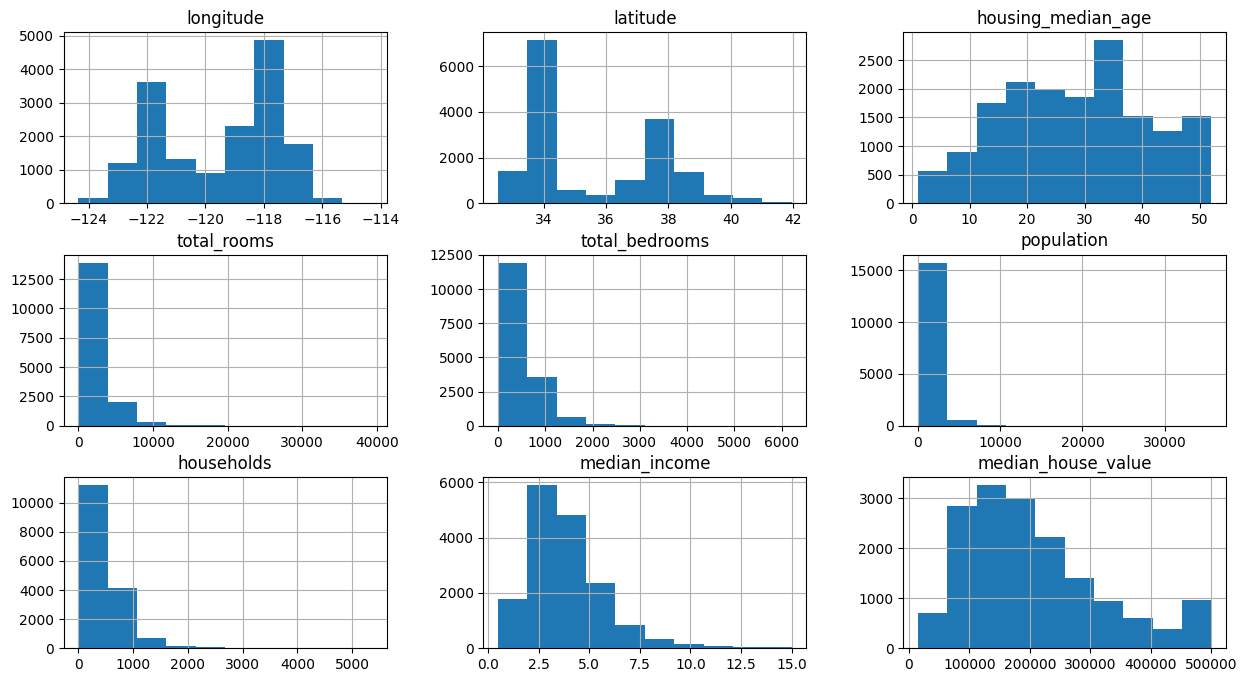

In [9]:
train_data.hist(figsize = (15,8)) # afficher des histogrammes de notre data

<Axes: >

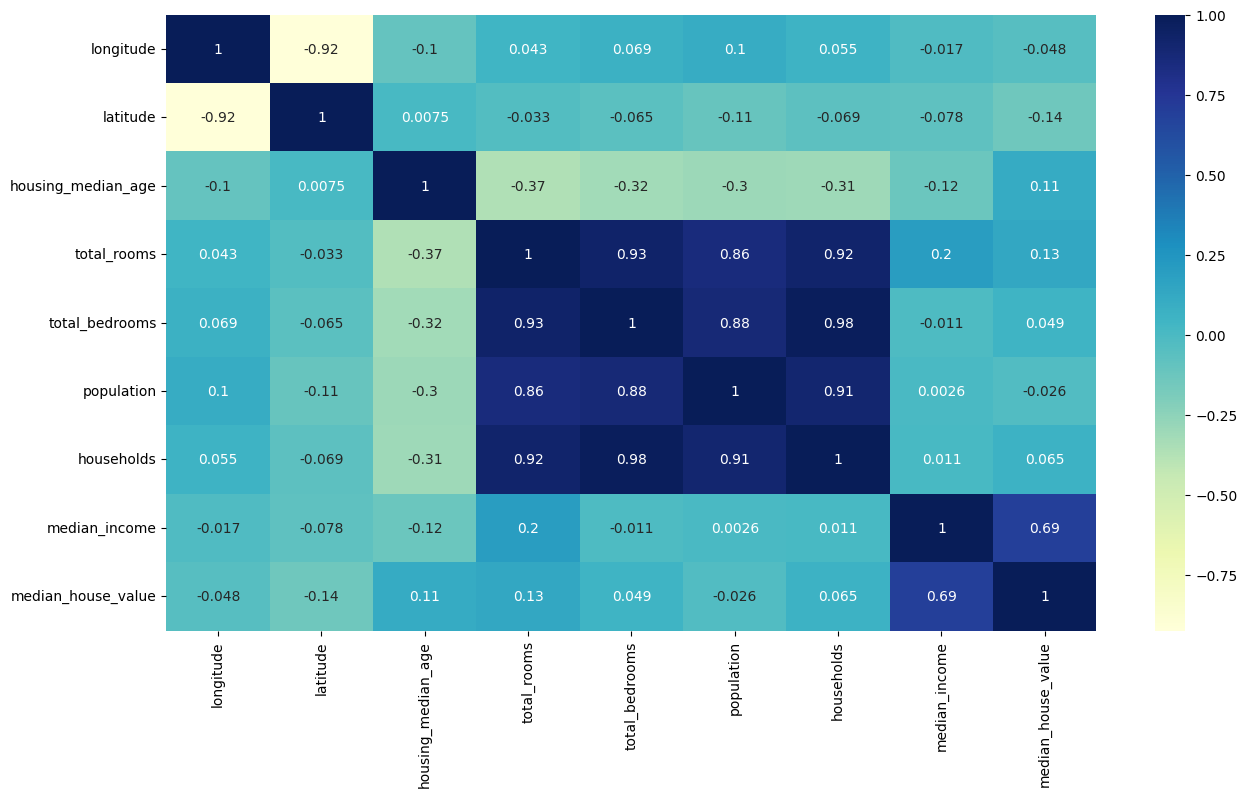

In [10]:
plt.figure(figsize = (15,8))
correlation = train_data.corr(numeric_only=True) # correlation est une matrice qui contient la correlation entre tous les éléments de notre data et on met numeric_only à True parce que on a des valeurs qui ne sont pas numériques (NearBay etc..)
sns.heatmap(correlation,annot = True, cmap="YlGnBu")

# On remarque d'après le tableau que le median_income a un lien très fort avec median_house_value qui est notre target 

In [11]:
# si on regarde l'histogramme pour les varibales ci-dessous on remarque que ces variables sont right-skewed (trop d'espace à droite) alors pour les équilibrer on applique le logaritme et on rajoute +1 pour ne pas avoir 0 
train_data['total_rooms'] = np.log(train_data['total_rooms']) + 1
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']) + 1       
train_data['population'] = np.log(train_data['population']) + 1
train_data['households'] = np.log(train_data['households']) + 1                                   

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

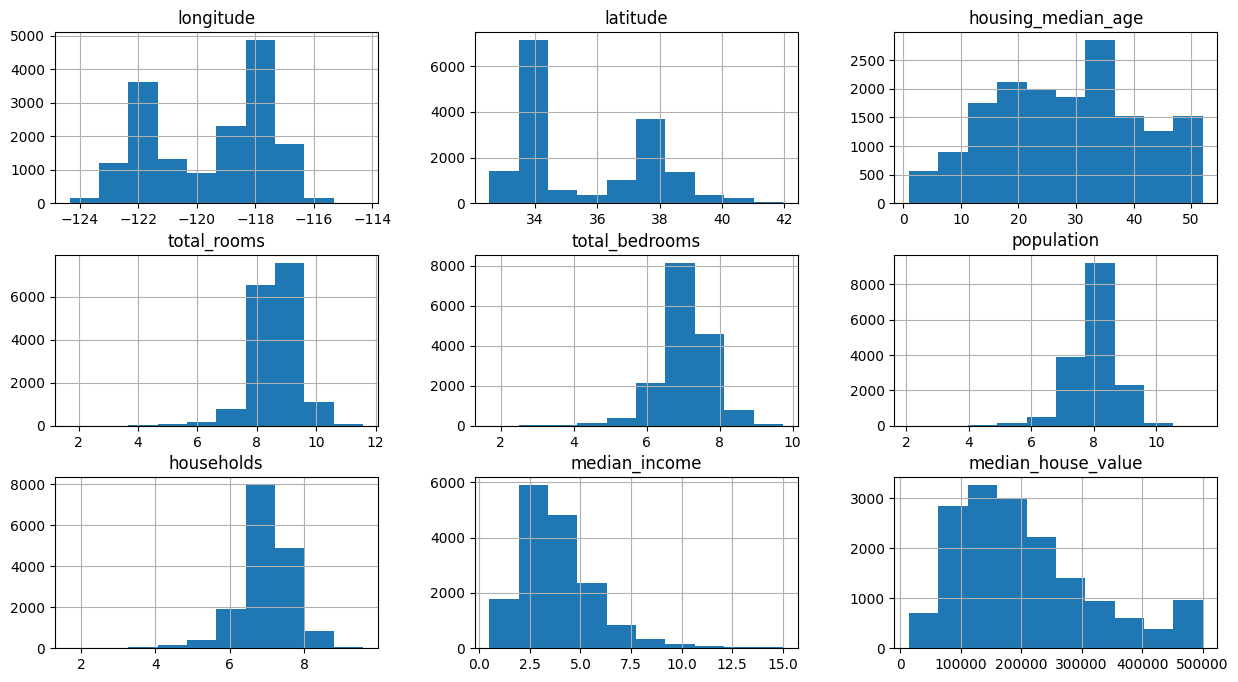

In [12]:
train_data.hist(figsize = (15,8))

In [13]:
train_data.ocean_proximity.value_counts() # voici les catégories qui ne sont pas numériques

ocean_proximity
<1H OCEAN     7199
INLAND        5203
NEAR OCEAN    2135
NEAR BAY      1804
ISLAND           5
Name: count, dtype: int64

In [14]:
pd.get_dummies(train_data.ocean_proximity) # on a créer de nouveaux paramètres représentant la distance entre la mer et la maison


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4087,True,False,False,False,False
711,False,False,False,True,False
13133,False,True,False,False,False
13278,False,True,False,False,False
9256,False,True,False,False,False
...,...,...,...,...,...
13258,False,True,False,False,False
979,False,True,False,False,False
8991,True,False,False,False,False
5605,True,False,False,False,False


In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)) # joincture avec nos données et on enlève la colonne inutile

In [16]:
train_data = train_data.drop(['ocean_proximity'],axis = 1)
train_data
# on a la nouvelle data sans la colonne ocean proximity et avec de nouvelles colonnes <1H OCEAN	INLAND	ISLAND	NEAR BAY	NEAR OCEAN

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4087,-118.40,34.15,31.0,9.263848,7.812345,8.336286,7.740519,3.0398,369100.0,1,0,0,0,0
711,-122.08,37.68,26.0,8.865955,7.525030,8.244942,7.408529,2.6563,184100.0,0,0,0,1,0
13133,-121.42,38.47,11.0,9.642062,8.317876,9.137980,8.169350,2.3343,97800.0,0,1,0,0,0
13278,-117.65,34.09,46.0,8.101676,6.638355,7.552508,6.683580,2.7083,116300.0,0,1,0,0,0
9256,-120.05,36.96,37.0,7.907755,6.564520,7.995766,6.451038,1.4267,52300.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13258,-117.69,34.10,17.0,9.231908,7.942157,8.451242,7.741701,2.6074,137500.0,0,1,0,0,0
979,-121.87,37.67,10.0,9.374938,7.684612,8.502738,7.610696,5.5000,247200.0,0,1,0,0,0
8991,-118.35,34.00,30.0,8.538495,6.420535,7.606650,6.583496,6.4310,492500.0,1,0,0,0,0
5605,-118.29,33.79,10.0,9.218248,7.923629,8.956827,7.854355,2.0000,165400.0,1,0,0,0,0


<Axes: >

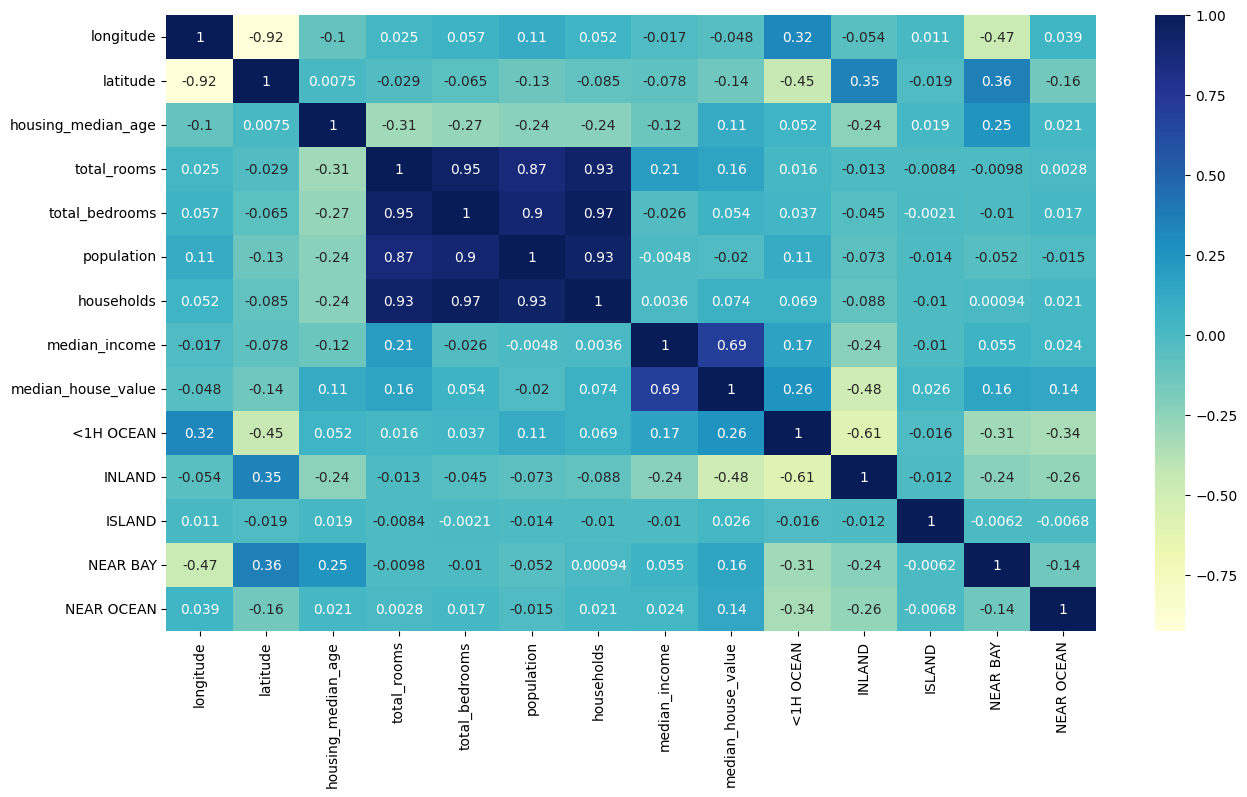

In [17]:
plt.figure(figsize = (15,8))
correlation = train_data.corr() 
sns.heatmap(correlation,annot = True, cmap="YlGnBu") #maintenant on regarde la correlation avec les nouvelles colonnes 

<Axes: xlabel='latitude', ylabel='longitude'>

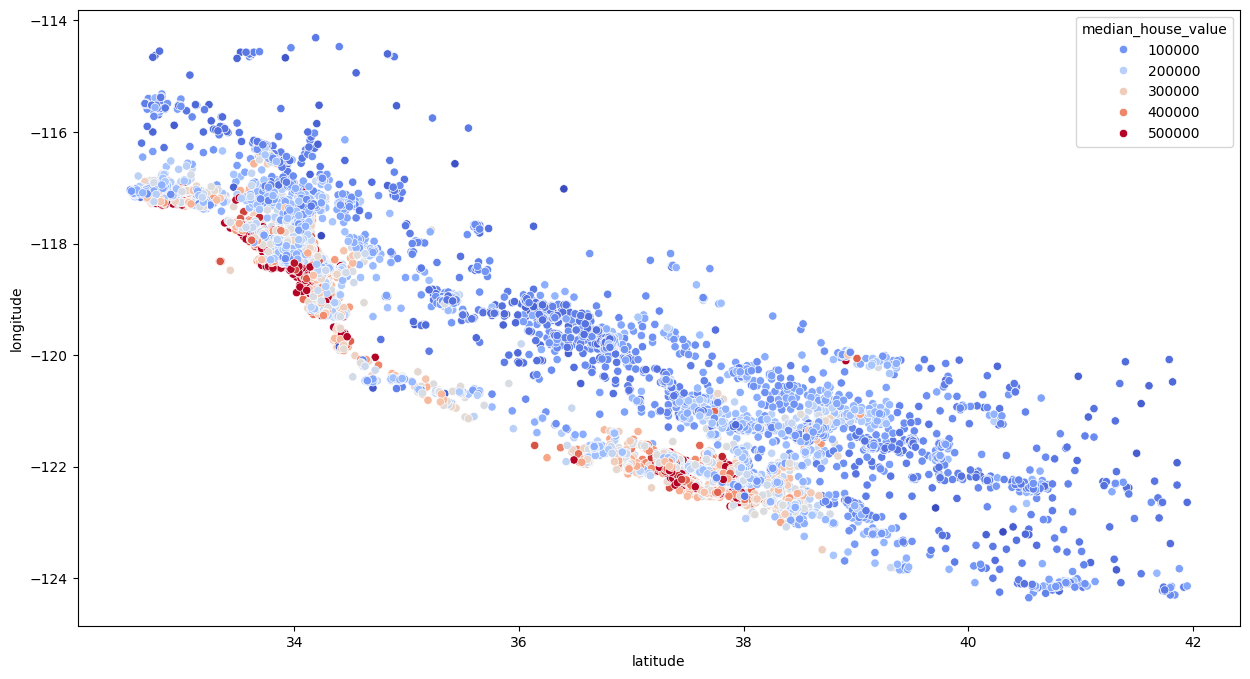

In [18]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")
# ici on represente les positions des maisons et en variant les couleurs on distungue la fourchette des prix de ces maisons en bas à gauche c'est l'océan et on remarque plus on est proche de l'océan plus les maisons sont chers

In [19]:
train_data['bedroom_ration'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']
# on rajoute deux nouveaux paramètres : le ratio des chambres avec lit et le ration de chambres par maison puisque en réalité le nombre de chambres qu'on a comme donées n'est pas par maison mais par block (secteur)

<Axes: >

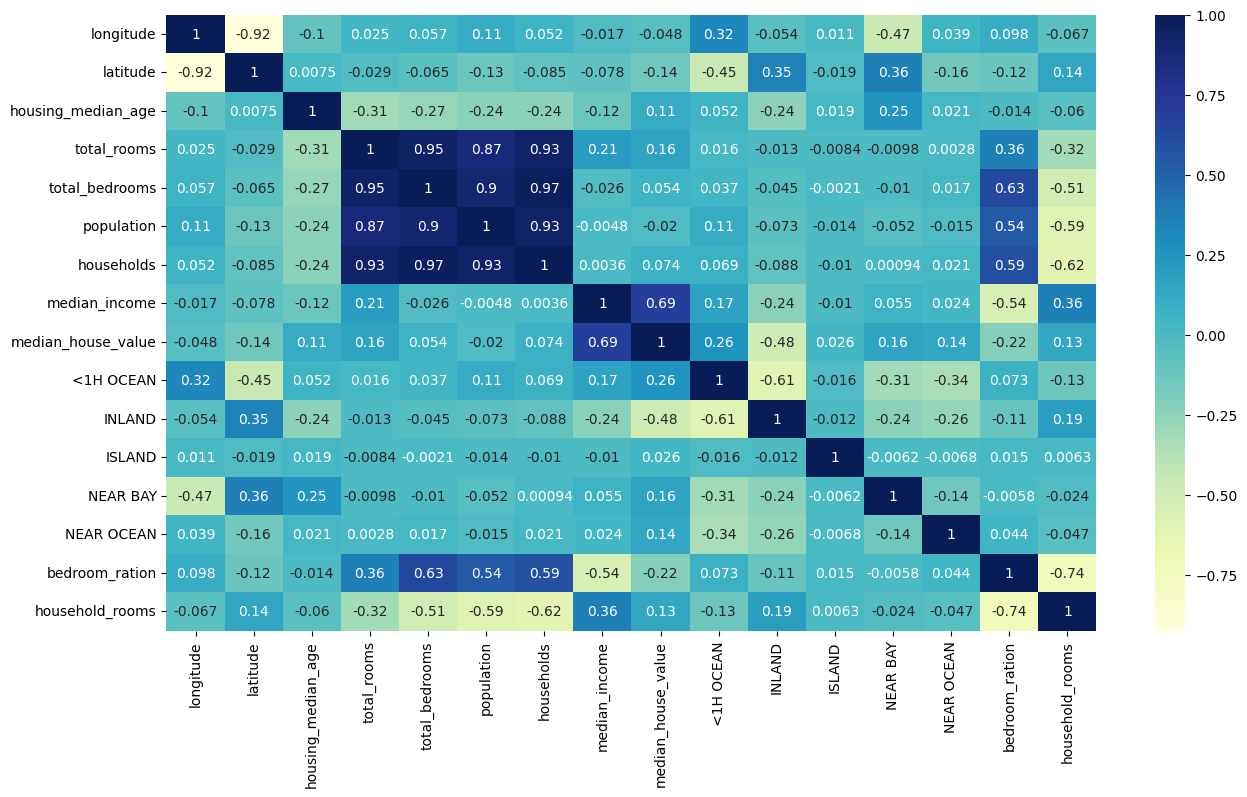

In [20]:
plt.figure(figsize = (15,8))
correlation = train_data.corr() 
sns.heatmap(correlation,annot = True, cmap="YlGnBu") #maintenant on regarde la correlation avec les nouvelles colonnes 
# ce qu'on a fait ici c'est qu'on a inventé deux nouvelles features qui ont permis d'avoir une correlation plus importante avec notre target : la correlation de households et de total rooms n'est pas importante

In [21]:
from sklearn.linear_model import LinearRegression
X_train,Y_train = train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
reg = LinearRegression()
reg.fit(X_train,Y_train)

#ici on effectue notre régression linéaire avec nos données de training

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
test_data = X_test.join(Y_test) 
test_data['total_rooms'] = np.log(test_data['total_rooms']) + 1
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']) + 1       
test_data['population'] = np.log(test_data['population']) + 1
test_data['households'] = np.log(test_data['households']) + 1
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity, dtype=int)) 
test_data = test_data.drop(['ocean_proximity'],axis = 1)
test_data['bedroom_ration'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
# ici on effectue les meme étapes pour le test_data

In [23]:
X_test,Y_test = test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']


In [24]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ration,household_rooms
8921,-118.48,34.02,25.0,8.367077,7.131226,7.890609,7.045005,2.7019,1,0,0,0,0.852296,1.187661
5075,-118.31,33.98,52.0,8.588324,6.937536,7.949856,6.916202,2.3977,1,0,0,0,0.807787,1.241769
3359,-120.64,40.41,50.0,8.462215,7.049733,7.894670,6.948035,1.5066,0,1,0,0,0.833084,1.217929
8241,-118.19,33.77,31.0,8.444833,7.538140,7.995766,7.342121,1.0714,0,0,0,1,0.892633,1.150190
2440,-119.60,36.57,42.0,8.745436,7.084499,8.205635,7.077642,2.5556,0,1,0,0,0.810080,1.235643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7253,-118.14,34.01,36.0,7.553933,6.347108,7.726233,6.375278,2.2500,1,0,0,0,0.840239,1.184879
4604,-118.33,34.06,52.0,8.518064,6.480639,7.541030,6.384495,15.0001,1,0,0,0,0.760811,1.334180
1857,-124.17,41.76,20.0,8.890957,7.287859,8.156177,7.242223,2.4605,0,0,0,1,0.819693,1.227656
10911,-117.86,33.73,23.0,7.008813,5.682131,7.472346,5.564348,3.7750,1,0,0,0,0.810712,1.259593


In [25]:
if 'ISLAND' not in X_test.columns:
    X_test['ISLAND'] = 0
# Réordonner les colonnes de X_test pour correspondre exactement à X_train
X_test = X_test[X_train.columns]
    
reg.score(X_test,Y_test)

# Cela nous donne le score de notre régression pour l'instant on est à 68% de précision.

0.646370657576636

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Arbres des décisions : Amélioration du score 

forest = RandomForestRegressor()

forest.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [27]:
forest.score(X_test,Y_test)

0.8131683559463214

In [30]:
from sklearn.model_selection import GridSearchCV #On importe GridSearchCV, qui est un outil de scikit-learn pour chercher automatiquement les meilleurs hyperparamètres d’un modèle.


forest = RandomForestRegressor() # on initialise une foret

param_grid = {
    "n_estimators" : [3,10,30],
    "max_features":[2,4,6,8]
}
# ici on a déclaré quelques paramètres de test : nombres d'arbres et nb le features max

grid_search = GridSearchCV(forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True) # on demande a la fonction de nous trouver les meilleurs parametres pour avoir une erruer min

#grid_search ici contient plein d'informations tels que les parametres qu'on doit choisir pour optimiser le résultat
grid_search.fit(X_train,Y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,30


In [34]:
best_forest = grid_search.best_estimator_


In [35]:
best_forest.score(X_test,Y_test)

0.8024998349166425

In [36]:
# On remarque qu'on ne trouve pas une meilleure précision pour notre modèle peut etre en modifiant encore plus les parametres de nos decision trees on pourra l'améliorer